In [1]:
from csv import DictReader

In [2]:
import seaborn
import matplotlib
from matplotlib import pyplot
from numpy import arange

In [3]:
locationFiles = []

with open("formatted_data/locations_final.csv", "r", encoding="utf-8") as locationsCsvFile:
    reader = DictReader(locationsCsvFile)
    for row in reader:
        locationFiles.append(row["ref"] +".csv")

In [4]:
monthCounts = []
monthCountsLookup = {}

for locationFile in locationFiles:
    with open(f"formatted_data/{locationFile}", "r", encoding="utf-8") as locationCsvFile:
        reader = DictReader(locationCsvFile)
        for row in reader:
            year = row["yyyy"]
            month = row["mm"]
            monthId = f"{year}-{month}"
            if monthId in monthCountsLookup:
                monthCounts[monthCountsLookup[monthId]]["COUNT"] += 1
                #monthCounts[monthCountsLookup[monthId]]["STATIONS"].append(locationFile.split("data.")[0])
            else:
                monthCountsLookup[monthId] = len(monthCounts)
                monthCounts.append({
                    "YEAR": int(year),
                    "MONTH": int(month),
                    "DISPLAY": monthId,
                    "COUNT": 1
                    #"STATIONS": [locationFile.split("data.")[0]]
                })

monthCounts.sort(key=lambda x: (x["YEAR"], x["MONTH"]))

#print("\n".join([str(month["YEAR"]) +"-"+ str(month["MONTH"]) for month in monthCounts]))

In [5]:
pyplot.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

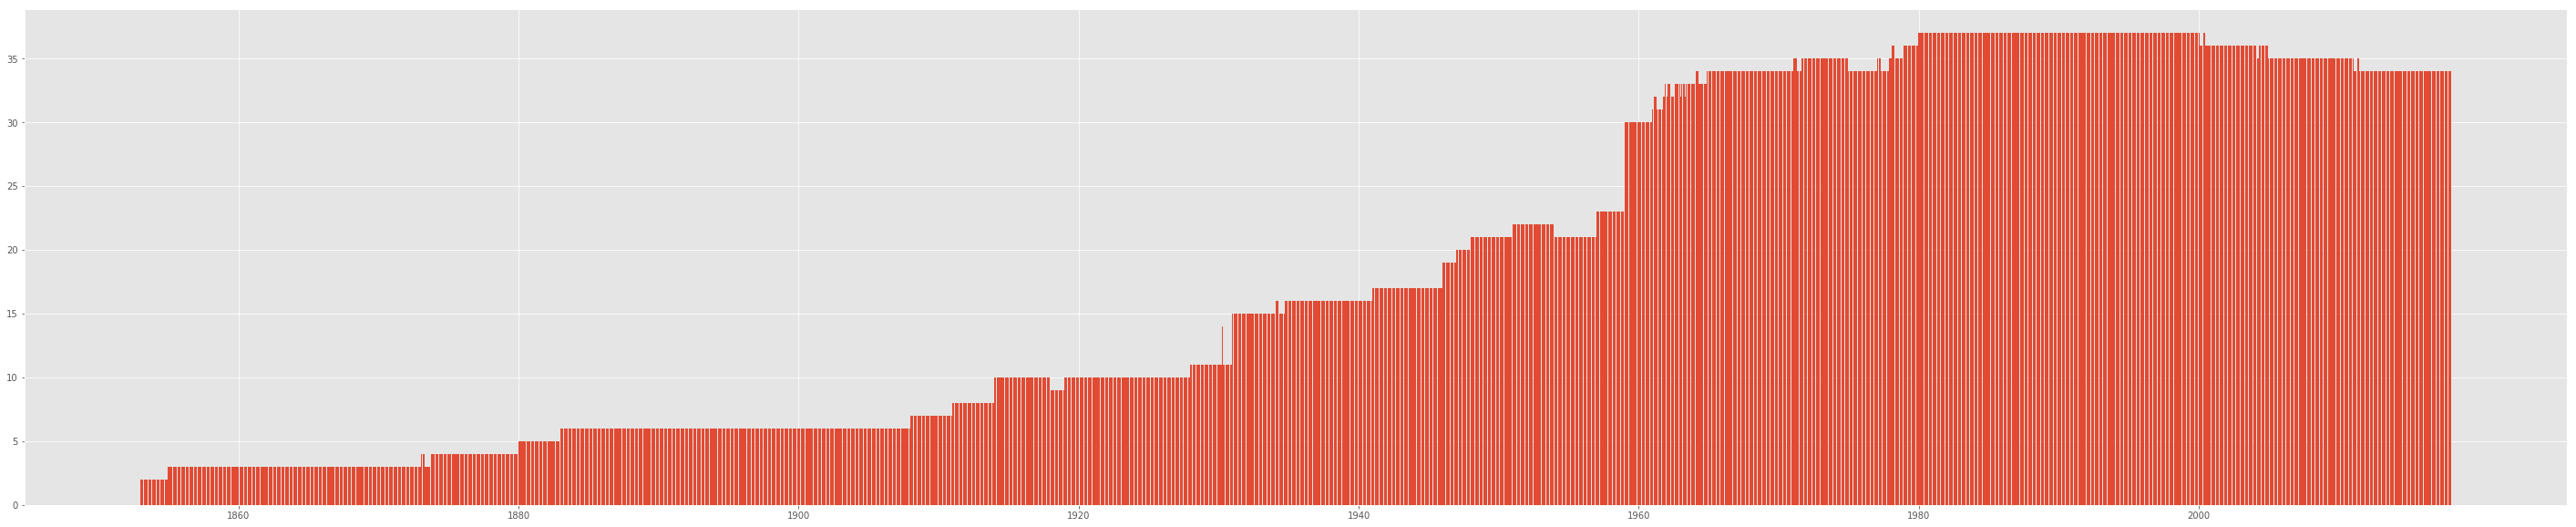

In [7]:
monthCountsLookup = {}
for iMonth in range(len(monthCounts)):
    monthCountsLookup[monthCounts[iMonth]["DISPLAY"]] = iMonth

displayYears = ["1860", "1880", "1900", "1920", "1940", "1960", "1980", "2000"]
displayMonths = []
for year in displayYears:
    displayMonths.append(monthCountsLookup[f"{year}-1"])

months = [month["DISPLAY"] for month in monthCounts]
counts = [month["COUNT"] for month in monthCounts]

matplotlib.rcParams["figure.figsize"] = (50, 10)
pyplot.style.use("ggplot")
#with pyplot.xkcd():
#pyplot.plot(list(range(len(display))), counts)
pyplot.bar(months, counts)
pyplot.xticks(displayMonths, displayYears)
pyplot.autoscale(enable=True, axis="both")
pyplot.show()